<a href="https://www.kaggle.com/code/sarraverse/01-data-cleaning?scriptVersionId=284158421" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/job-skills/skill_migration_public.csv
/kaggle/input/job-skills/all_jobs_clustered_full.csv
/kaggle/input/job-skills/association_rules_categories.csv
/kaggle/input/job-skills/all_jobs_mapped.csv
/kaggle/input/job-skills/all_jobs_clustered_sample_dbscan.csv
/kaggle/input/job-skills/association_rules_combined.csv
/kaggle/input/job-skills/all_jobs_clean_full.csv
/kaggle/input/job-skills/skill_migration_clean.csv
/kaggle/input/job-skills/association_rules_skills.csv
/kaggle/input/job-skills/all_jobs.csv


# DATA CLEANING AND PREPROCESSING

📊 DATA CLEANING PIPELINE
STEP 1: Cleaning job postings dataset
🚀 STARTING DATA CLEANING PIPELINE

📁 STEP 1: Cleaning job postings...
Reading from: /kaggle/input/job-skills/all_jobs.csv
Writing to: /kaggle/working/all_jobs_clean_full.csv
📈 Getting initial statistics...
Sample shape: (10000, 10)
Processing chunk 2...
Processing chunk 3...
Processing chunk 4...
Processing chunk 5...
Processing chunk 6...
Processing chunk 7...
Processing chunk 8...
Processing chunk 9...
Processing chunk 10...
Processing chunk 11...
Processing chunk 12...
Processing chunk 13...
Processing chunk 14...
Processing chunk 15...
Processing chunk 16...
Processing chunk 17...
Processing chunk 18...
Processing chunk 19...
Processing chunk 20...
Processing chunk 21...
Processing chunk 22...
Processing chunk 23...
Processing chunk 24...
Processing chunk 25...
Processing chunk 26...
Processing chunk 27...
Processing chunk 28...
Processing chunk 29...
Processing chunk 30...
Processing chunk 31...
Processing chunk 32...


/tmp/ipykernel_19/2359950758.py:224: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_19/2359950758.py:225: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.savefig('/kaggle/working/data_cleaning_results.png', dpi=150, bbox_inches='tight')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


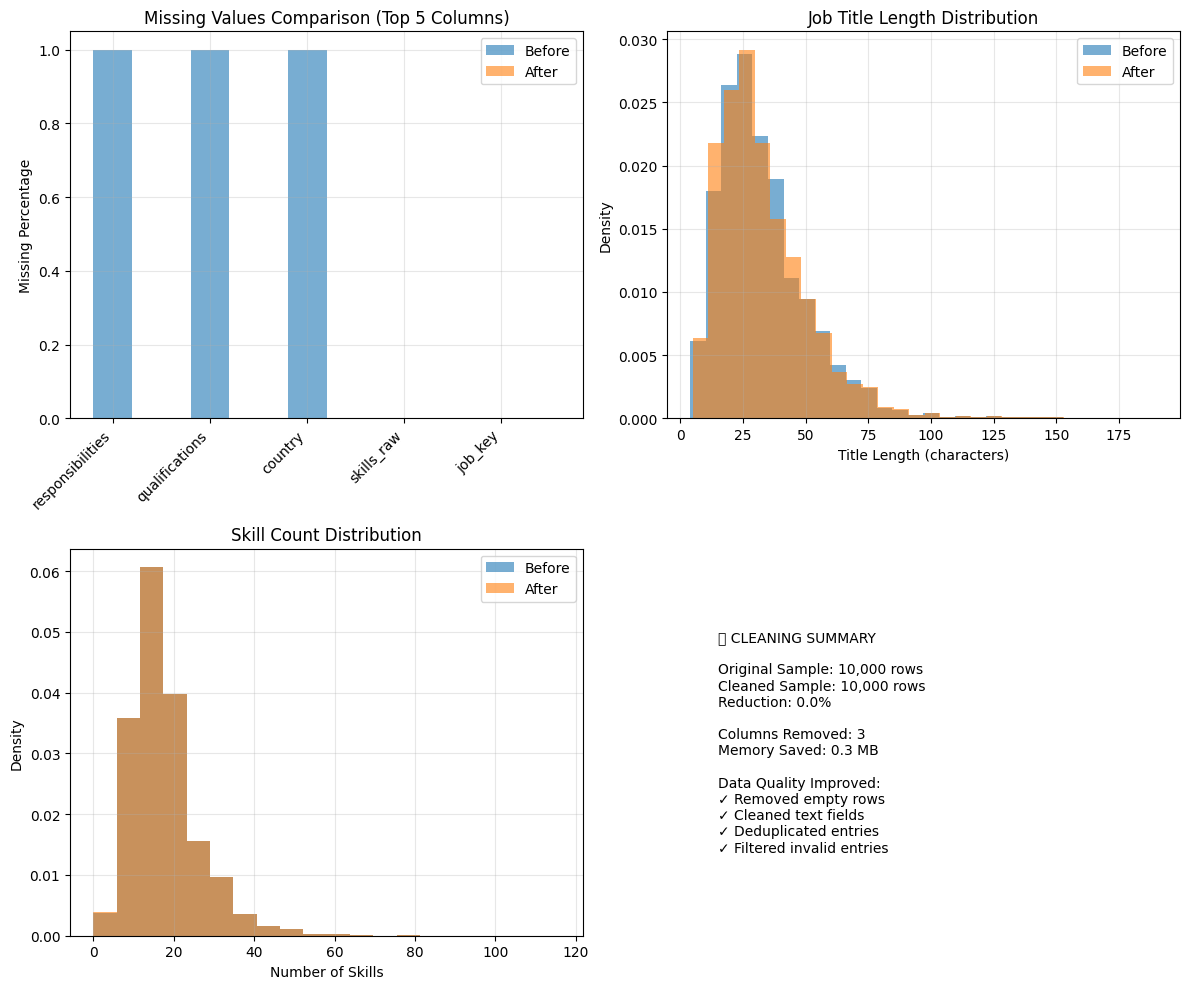


📁 STEP 2: Cleaning skills taxonomy...

STEP 2: Cleaning skills taxonomy dataset
Raw skills shape: (17617, 12)
After dropping NA skills: (17617, 2)
After dropping duplicates: (249, 2)
After resolving skill conflicts: (249, 2)
✅ Saved cleaned skills to: /kaggle/working/skill_migration_clean.csv

📋 Sample of cleaned skills:
                         skill_group_name         skill_group_category
0                  information management                  tech skills
1                  operational efficiency              business skills
2                       national security  specialized industry skills
3                        software testing                  tech skills
4                                    navy  specialized industry skills
5                       materials science       disruptive tech skills
6                            criminal law  specialized industry skills
7                         problem solving                  soft skills
8  software development life cycle (s

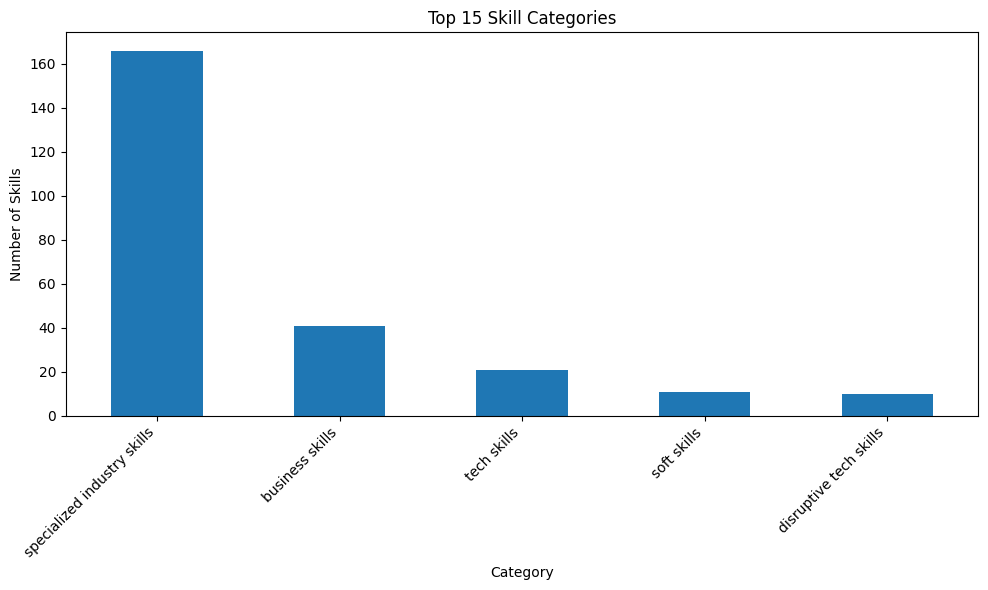


📁 STEP 3: Mapping skills to jobs...

STEP 3: Mapping skills to job postings
Loaded 249 skills for mapping.
Reading from: /kaggle/working/all_jobs_clean_full.csv
Writing to: /kaggle/working/all_jobs_mapped.csv
Processing chunk 2 (50000 rows)...
Processing chunk 3 (50000 rows)...
Processing chunk 4 (50000 rows)...
Processing chunk 5 (50000 rows)...
Processing chunk 6 (50000 rows)...
Processing chunk 7 (50000 rows)...
Processing chunk 8 (50000 rows)...
Processing chunk 9 (50000 rows)...
Processing chunk 10 (50000 rows)...
Processing chunk 11 (50000 rows)...
Processing chunk 12 (50000 rows)...
Processing chunk 13 (50000 rows)...
Processing chunk 14 (50000 rows)...
Processing chunk 15 (50000 rows)...
Processing chunk 16 (50000 rows)...
Processing chunk 17 (50000 rows)...
Processing chunk 18 (50000 rows)...
Processing chunk 19 (50000 rows)...
Processing chunk 20 (50000 rows)...
Processing chunk 21 (50000 rows)...
Processing chunk 22 (50000 rows)...
Processing chunk 23 (50000 rows)...
Proces

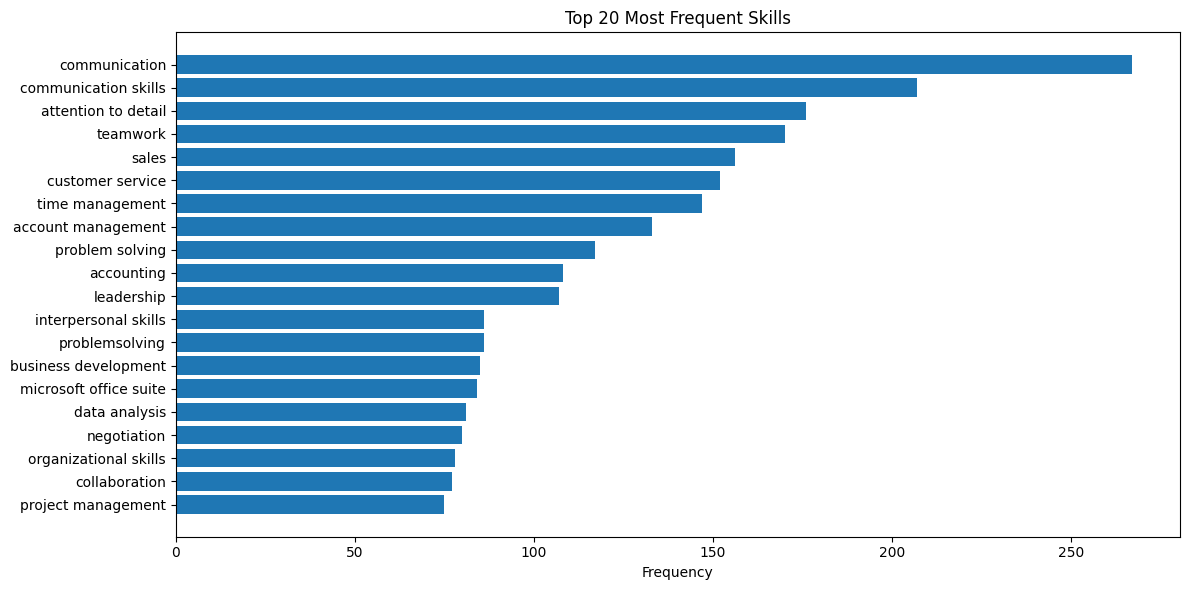


✅ DATA CLEANING PIPELINE COMPLETE!

📁 OUTPUT FILES CREATED:
  ✓ all_jobs_clean_full.csv (6072.2 MB)
  ✓ skill_migration_clean.csv (0.0 MB)
  ✓ all_jobs_mapped.csv (6902.1 MB)
  ✓ data_cleaning_results.png (0.2 MB)
  ✓ skill_categories_distribution.png (0.1 MB)
  ✓ top_skills_distribution.png (0.1 MB)


In [2]:
"""
DATA CLEANING AND PREPROCESSING
Teacher Requirement: Apply preprocessing techniques according to the application domain
"""
import pandas as pd
import re
import os
from pathlib import Path
import matplotlib.pyplot as plt

print("📊 DATA CLEANING PIPELINE")

# ====================
# STEP 1: Clean all_jobs dataset
# ====================
print("STEP 1: Cleaning job postings dataset")

input_path = "/kaggle/input/job-skills/all_jobs.csv"
output_path = "/kaggle/working/all_jobs_clean_full.csv"
chunksize = 50000

# 🔐 for GLOBAL duplicate removal
seen_job_keys = set()       # for drop_duplicates(subset=["job_key"])
seen_composite_keys = set() # for drop_duplicates subset combo

# 1️⃣ Your cleaning function, vectorized-style
def clean_text_series(s: pd.Series):
    return (
        s.astype(str)
        .str.replace("\n", " ", regex=False)
        .str.replace("\r", " ", regex=False)
        .str.replace(r"\s+", " ", regex=True)
        .str.strip()
    )

# 2️⃣ same logic: empty row = no title, no desc, no skills
def drop_fully_empty_rows(df: pd.DataFrame) -> pd.DataFrame:
    def is_empty(x):
        return (pd.isna(x)) or (str(x).strip() == "")

    mask_keep = ~(
        df["job_title"].apply(is_empty) &
        df["job_description"].apply(is_empty) &
        df["skills_raw"].apply(is_empty)
    )
    return df[mask_keep].copy()

# 3️⃣ Create composite key for deduplication
def make_composite_key(row):
    parts = [
        str(row.get("job_title", "")).lower(),
        str(row.get("company", "")).lower(),
        str(row.get("location", "")).lower(),
        str(row.get("job_description", "")).lower()[:200],
    ]
    return "||".join(parts)

# 4️⃣ Process each chunk
def process_chunk(chunk: pd.DataFrame):
    global seen_job_keys, seen_composite_keys

    # Drop very sparse columns if they exist
    for col in ["responsibilities", "qualifications", "country"]:
        if col in chunk.columns:
            chunk = chunk.drop(columns=[col])

    # Fill missing values for text columns
    for col in ["job_title", "job_description", "skills_raw"]:
        if col in chunk.columns:
            chunk[col] = chunk[col].fillna("")

    # Step 1: Drop rows with empty title+desc+skills
    chunk = drop_fully_empty_rows(chunk)

    # Step 2: Clean text
    cols_to_clean = ["job_title", "job_description", "skills_raw",
                     "location", "company", "country"]
    for col in cols_to_clean:
        if col in chunk.columns:
            chunk[col] = clean_text_series(chunk[col])

    # Step 3: Filter short title/desc
    if "job_title" in chunk.columns:
        chunk = chunk[chunk["job_title"].str.len() >= 5]
    if "job_description" in chunk.columns:
        chunk = chunk[chunk["job_description"].str.len() >= 30]

    # Step 4: Global dedup by job_key
    if "job_key" in chunk.columns:
        mask_new_key = ~chunk["job_key"].isin(seen_job_keys)
        chunk = chunk[mask_new_key].copy()
        seen_job_keys.update(chunk["job_key"].tolist())

    # Step 5: Global dedup by composite key
    chunk["__dedup_key__"] = chunk.apply(make_composite_key, axis=1)
    mask_new_combo = ~chunk["__dedup_key__"].isin(seen_composite_keys)
    chunk = chunk[mask_new_combo].copy()
    seen_composite_keys.update(chunk["__dedup_key__"].tolist())
    chunk = chunk.drop(columns=["__dedup_key__"])

    return chunk

# 5️⃣ Main cleaning function
def run_full_clean():
    print(f"Reading from: {input_path}")
    print(f"Writing to: {output_path}")
    
    first = True
    total_rows = 0
    
    # Get initial stats from original file
    print("📈 Getting initial statistics...")
    original_sample = pd.read_csv(input_path, nrows=10000)
    print(f"Sample shape: {original_sample.shape}")
    
    for chunk in pd.read_csv(input_path, chunksize=chunksize):
        total_rows += len(chunk)
        print(f"Processing chunk {total_rows//chunksize + 1}...")
        
        cleaned_chunk = process_chunk(chunk)
        
        # Save cleaned chunk
        cleaned_chunk.to_csv(
            output_path,
            mode="w" if first else "a",
            header=first,
            index=False
        )
        first = False
    
    print(f"✅ Finished processing {total_rows:,} rows")
    print(f"Saved cleaned data to: {output_path}")
    
    # Load cleaned data for visualization
    print("📊 Loading cleaned data for visualization...")
    if os.path.exists(output_path):
        cleaned_df = pd.read_csv(output_path, nrows=10000)
        
        # AFTER PREPROCESSING VISUALIZATIONS
        print("\n" + "="*50)
        print("AFTER PREPROCESSING RESULTS")
        print("="*50)
        
        # Create comparison
        comparison = pd.DataFrame({
            'Metric': ['Rows', 'Columns', 'Memory (MB)', 'Missing Values %'],
            'Before': [
                len(original_sample),
                original_sample.shape[1],
                original_sample.memory_usage(deep=True).sum() / (1024**2),
                original_sample.isna().mean().mean() * 100
            ],
            'After': [
                len(cleaned_df),
                cleaned_df.shape[1],
                cleaned_df.memory_usage(deep=True).sum() / (1024**2),
                cleaned_df.isna().mean().mean() * 100
            ]
        })
        
        print("\n📋 Comparison Table:")
        print(comparison.to_string(index=False))
        
        # Create visualization
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        
        # 1. Missing values comparison
        original_missing = original_sample.isna().mean().sort_values(ascending=False).head(5)
        cleaned_missing = cleaned_df.isna().mean().sort_values(ascending=False).head(5)
        
        x = range(len(original_missing))
        axes[0,0].bar(x, original_missing.values, alpha=0.6, width=0.4, label='Before', align='edge')
        axes[0,0].bar([i + 0.4 for i in x], cleaned_missing.values, alpha=0.6, width=0.4, label='After', align='edge')
        axes[0,0].set_xticks([i + 0.2 for i in x])
        axes[0,0].set_xticklabels(original_missing.index, rotation=45, ha='right')
        axes[0,0].set_ylabel('Missing Percentage')
        axes[0,0].set_title('Missing Values Comparison (Top 5 Columns)')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        
        # 2. Text length distribution
        axes[0,1].hist(original_sample['job_title'].str.len().dropna(), 
                      bins=30, alpha=0.6, label='Before', density=True)
        axes[0,1].hist(cleaned_df['job_title'].str.len().dropna(), 
                      bins=30, alpha=0.6, label='After', density=True)
        axes[0,1].set_xlabel('Title Length (characters)')
        axes[0,1].set_ylabel('Density')
        axes[0,1].set_title('Job Title Length Distribution')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
        
        # 3. Skill count distribution
        if 'skills_raw' in cleaned_df.columns:
            original_skills = original_sample['skills_raw'].str.split(',').str.len().fillna(0)
            cleaned_skills = cleaned_df['skills_raw'].str.split(',').str.len().fillna(0)
            
            axes[1,0].hist(original_skills, bins=20, alpha=0.6, label='Before', density=True)
            axes[1,0].hist(cleaned_skills, bins=20, alpha=0.6, label='After', density=True)
            axes[1,0].set_xlabel('Number of Skills')
            axes[1,0].set_ylabel('Density')
            axes[1,0].set_title('Skill Count Distribution')
            axes[1,0].legend()
            axes[1,0].grid(True, alpha=0.3)
        
        # 4. Summary statistics
        axes[1,1].axis('off')
        summary_text = f"""📊 CLEANING SUMMARY

Original Sample: {len(original_sample):,} rows
Cleaned Sample: {len(cleaned_df):,} rows
Reduction: {(1 - len(cleaned_df)/len(original_sample))*100:.1f}%

Columns Removed: {original_sample.shape[1] - cleaned_df.shape[1]}
Memory Saved: {(original_sample.memory_usage(deep=True).sum() - cleaned_df.memory_usage(deep=True).sum())/(1024**2):.1f} MB

Data Quality Improved:
✓ Removed empty rows
✓ Cleaned text fields
✓ Deduplicated entries
✓ Filtered invalid entries"""
        
        axes[1,1].text(0.1, 0.5, summary_text, fontsize=10, va='center')
        
        plt.tight_layout()
        plt.savefig('/kaggle/working/data_cleaning_results.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        return cleaned_df
    else:
        print("❌ Error: Cleaned file not created!")
        return None

# ====================
# STEP 2: Clean skill migration dataset
# ====================
def clean_skills_taxonomy():
    print("\n" + "="*50)
    print("STEP 2: Cleaning skills taxonomy dataset")
    print("="*50)
    
    # 1. Load raw file
    skills_raw = pd.read_csv("/kaggle/input/job-skills/skill_migration_public.csv")
    print(f"Raw skills shape: {skills_raw.shape}")
    
    # 2. Keep only useful columns
    skills = skills_raw[[
        "skill_group_name",
        "skill_group_category"
    ]].copy()
    
    # 3. Drop rows where skill name is missing
    skills = skills[skills["skill_group_name"].notna()].copy()
    print(f"After dropping NA skills: {skills.shape}")
    
    # 4. Normalize text (lowercase, strip)
    for col in ["skill_group_name", "skill_group_category"]:
        if col in skills.columns:
            skills[col] = (
                skills[col]
                .astype(str)
                .str.strip()
                .str.lower()
            )
    
    # 5. Drop exact duplicates
    skills = skills.drop_duplicates(subset=["skill_group_name", "skill_group_category"])
    print(f"After dropping duplicates: {skills.shape}")
    
    # 6. If one skill appears with multiple categories, keep the first one
    skills = skills.drop_duplicates(subset=["skill_group_name"], keep="first")
    print(f"After resolving skill conflicts: {skills.shape}")
    
    # 7. Save cleaned skills
    skills_output_path = "/kaggle/working/skill_migration_clean.csv"
    skills.to_csv(skills_output_path, index=False)
    print(f"✅ Saved cleaned skills to: {skills_output_path}")
    
    # 8. Show sample
    print("\n📋 Sample of cleaned skills:")
    print(skills.head(10))
    
    # 9. Visualize skill categories
    plt.figure(figsize=(10, 6))
    category_counts = skills["skill_group_category"].value_counts().head(15)
    category_counts.plot(kind='bar')
    plt.title('Top 15 Skill Categories')
    plt.xlabel('Category')
    plt.ylabel('Number of Skills')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('/kaggle/working/skill_categories_distribution.png', dpi=150)
    plt.show()
    
    return skills

# ====================
# STEP 3: Map skills to jobs
# ====================
def map_skills_to_jobs():
    print("\n" + "="*50)
    print("STEP 3: Mapping skills to job postings")
    print("="*50)
    
    # Check if cleaned jobs file exists
    jobs_file = "/kaggle/working/all_jobs_clean_full.csv"
    if not os.path.exists(jobs_file):
        print("❌ Error: Cleaned jobs file not found. Run Step 1 first.")
        return None
    
    # Load skills dictionary
    skills_file = "/kaggle/working/skill_migration_clean.csv"
    if not os.path.exists(skills_file):
        print("❌ Error: Cleaned skills file not found. Run Step 2 first.")
        return None
    
    skills_meta = pd.read_csv(skills_file)
    
    # Create skill dictionary
    skill_dict = (
        skills_meta[["skill_group_name", "skill_group_category"]]
        .drop_duplicates()
        .set_index("skill_group_name")["skill_group_category"]
        .to_dict()
    )
    
    print(f"Loaded {len(skill_dict)} skills for mapping.")
    
    # Helper functions
    def parse_skills(raw):
        if pd.isna(raw):
            return []
        text = str(raw).strip().lower()
        if not text:
            return []
        # Split by common separators
        parts = re.split(r",|/|;|\||\+", text)
        return [p.strip() for p in parts if p.strip()]
    
    def map_skill_categories(skill_list):
        cats = set()
        for s in skill_list:
            cat = skill_dict.get(s)
            if cat is None:
                cat = "other"
            cats.add(cat)
        if not cats:
            return ""
        return ",".join(sorted(cats))
    
    # Process in chunks
    input_path = "/kaggle/working/all_jobs_clean_full.csv"
    output_path = "/kaggle/working/all_jobs_mapped.csv"
    chunksize = 50000
    
    print(f"Reading from: {input_path}")
    print(f"Writing to: {output_path}")
    
    first = True
    total_rows = 0
    
    for chunk in pd.read_csv(input_path, chunksize=chunksize):
        total_rows += len(chunk)
        print(f"Processing chunk {total_rows//chunksize + 1} ({len(chunk)} rows)...")
        
        # Ensure skills_raw column exists
        if "skills_raw" not in chunk.columns:
            chunk["skills_raw"] = ""
        
        # Parse skills
        chunk["skill_list"] = chunk["skills_raw"].apply(parse_skills)
        
        # Map to categories
        chunk["skill_categories"] = chunk["skill_list"].apply(map_skill_categories)
        
        # Save mapped chunk
        chunk.to_csv(
            output_path,
            mode="w" if first else "a",
            header=first,
            index=False
        )
        first = False
    
    print(f"✅ Mapped {total_rows:,} jobs to skills")
    
    # Load and show sample of mapped data
    mapped_sample = pd.read_csv(output_path, nrows=1000)
    print(f"\n📋 Sample of mapped data:")
    print(f"Shape: {mapped_sample.shape}")
    
    # Show skill statistics
    all_skills = [skill for sublist in mapped_sample["skill_list"].apply(eval) for skill in sublist]
    print(f"Total skill instances: {len(all_skills)}")
    print(f"Unique skills found: {len(set(all_skills))}")
    
    # Visualize skill frequency
    if len(all_skills) > 0:
        from collections import Counter
        skill_counts = Counter(all_skills)
        top_skills = skill_counts.most_common(20)
        
        plt.figure(figsize=(12, 6))
        skills, counts = zip(*top_skills)
        plt.barh(range(len(skills)), counts)
        plt.yticks(range(len(skills)), skills)
        plt.xlabel('Frequency')
        plt.title('Top 20 Most Frequent Skills')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig('/kaggle/working/top_skills_distribution.png', dpi=150)
        plt.show()
    
    return mapped_sample

# ====================
# MAIN EXECUTION
# ====================
if __name__ == "__main__":
    print("🚀 STARTING DATA CLEANING PIPELINE")
    print("="*60)
    
    # Step 1: Clean jobs data
    print("\n📁 STEP 1: Cleaning job postings...")
    cleaned_jobs = run_full_clean()
    
    # Step 2: Clean skills taxonomy
    print("\n📁 STEP 2: Cleaning skills taxonomy...")
    cleaned_skills = clean_skills_taxonomy()
    
    # Step 3: Map skills to jobs
    print("\n📁 STEP 3: Mapping skills to jobs...")
    if cleaned_jobs is not None and cleaned_skills is not None:
        mapped_data = map_skills_to_jobs()
        
        # Final summary
        print("\n" + "="*60)
        print("✅ DATA CLEANING PIPELINE COMPLETE!")
        print("="*60)
        
        # List output files
        output_files = [
            "/kaggle/working/all_jobs_clean_full.csv",
            "/kaggle/working/skill_migration_clean.csv", 
            "/kaggle/working/all_jobs_mapped.csv",
            "/kaggle/working/data_cleaning_results.png",
            "/kaggle/working/skill_categories_distribution.png",
            "/kaggle/working/top_skills_distribution.png"
        ]
        
        print("\n📁 OUTPUT FILES CREATED:")
        for file in output_files:
            if os.path.exists(file):
                size_mb = os.path.getsize(file) / (1024**2)
                print(f"  ✓ {os.path.basename(file)} ({size_mb:.1f} MB)")
            else:
                print(f"  ✗ {os.path.basename(file)} (not found)")
    else:
        print("\n❌ Pipeline failed. Check error messages above.")